In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
features = dataset.iloc[:,1:2].values
goals = dataset.iloc[:,-1].values

In [4]:
def polynomial(data,degree=1):
    if degree == 1:
        return data
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    poly_features = poly.fit_transform(data)
    return poly_features

In [5]:
def plot(feature = [], actual = [], predicted = [], alpha = 1):
    plt.plot(feature, actual, '.', feature, predicted, '-')
    plt.show()

In [6]:
poly_features = []
for degree in range(1,15):
    poly_features.append(polynomial(features, degree = degree))
pd.DataFrame(poly_features[10])

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00
1,1.0,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03,2.048000e+03
2,1.0,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04,1.771470e+05
3,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,2.621440e+05,1.048576e+06,4.194304e+06
4,1.0,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1.953125e+06,9.765625e+06,4.882812e+07
5,1.0,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,1.007770e+07,6.046618e+07,3.627971e+08
6,1.0,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08,1.977327e+09
7,1.0,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,1.342177e+08,1.073742e+09,8.589935e+09
8,1.0,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09,3.138106e+10
9,1.0,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10,1.000000e+11


In [7]:
features

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

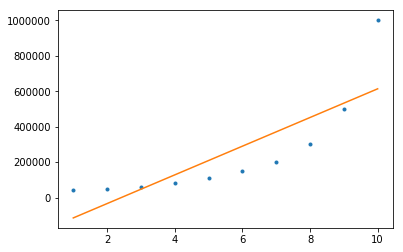

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(poly_features[0],goals)
plot(poly_features[0], goals, model.predict(poly_features[0]),1)

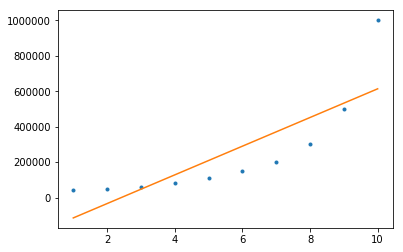

___________________________________________________________________


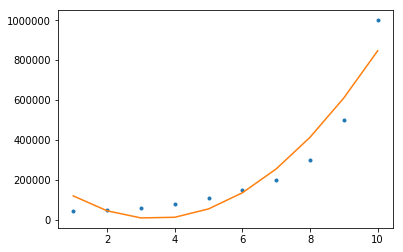

___________________________________________________________________


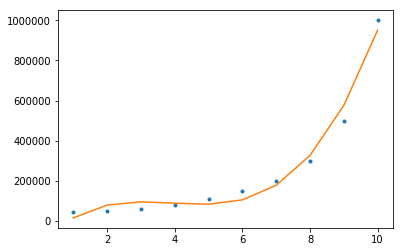

___________________________________________________________________


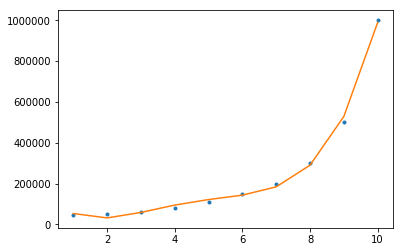

___________________________________________________________________


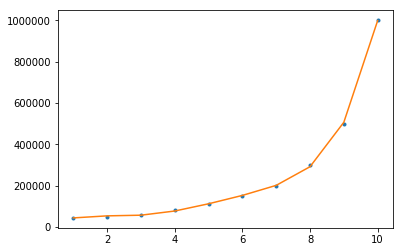

___________________________________________________________________


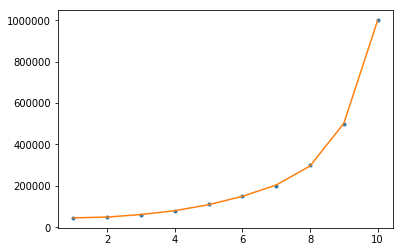

___________________________________________________________________


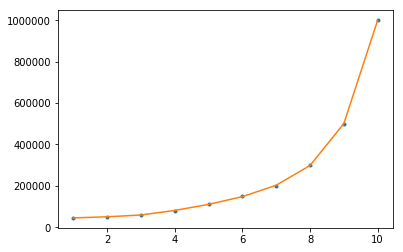

___________________________________________________________________


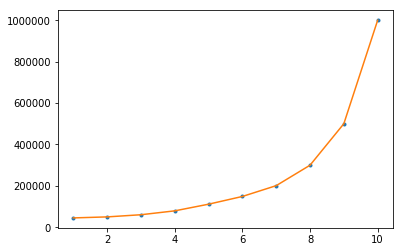

___________________________________________________________________


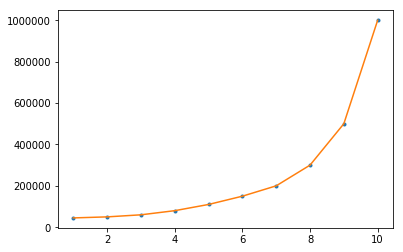

___________________________________________________________________


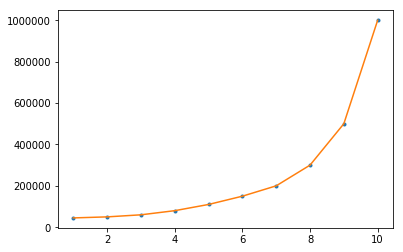

___________________________________________________________________


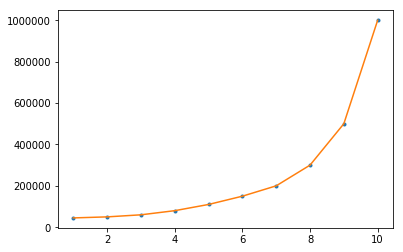

___________________________________________________________________


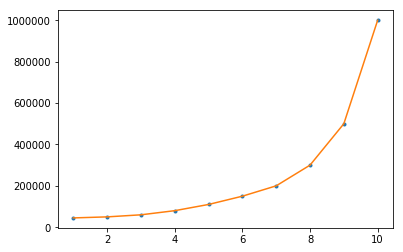

___________________________________________________________________


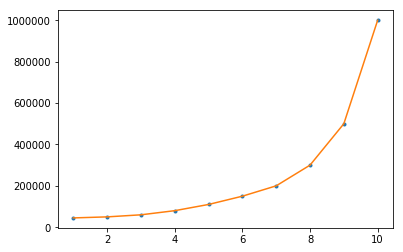

___________________________________________________________________


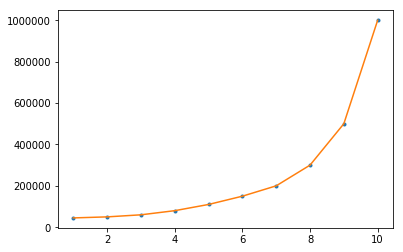

___________________________________________________________________


In [11]:
coeff_array = []
for degree in range(0,len(poly_features)):
    model.fit(poly_features[degree],goals)
    plot(poly_features[0],goals,model.predict(poly_features[degree]),degree+1)
    coeff_array.append(model.coef_)
    print("___________________________________________________________________")